In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

import json
from pprint import pprint

D:\Anaconda2\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
D:\Anaconda2\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


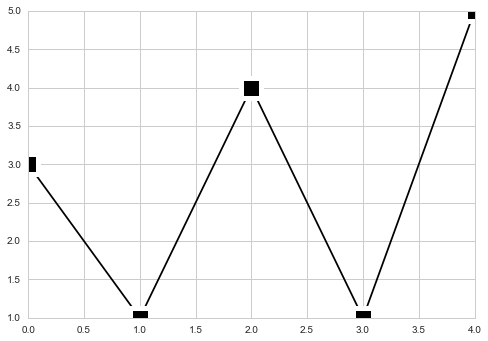

In [3]:
# fig, ax = plt.subplots()
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
fig=plt.gcf()

In [8]:
file_name = 'test.html'
mpld3.save_html(fig, './docs/'+file_name)

In [1]:
movie_list = [
    {'name': 'Movie 1',
    'genre' :'Action, Fantasy, Horror'},
    {'name': 'Movie 2',
    'genre' :'Action, Comedy, Family'},
    {'name': 'Movie 3',
    'genre' :'Biography, Drama'},
    {'name': 'Movie 4',
    'genre' :'Biography, Drama, Romance'},
    {'name': 'Movie 5',
    'genre' :'Drama'},
    {'name': 'Movie 6',
    'genre' :'Documentary'},
]

In [35]:
import sass
print sass.compile(string='a { b { color: blue; } }')

a b {
  color: blue; }



In [6]:
N = 500
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = pd.DataFrame({'x': x, 'y': y})
df.describe()

,x,y
count,500.000000,500.000000
mean,0.500000,0.021224
std,0.289543,1.015742
min,0.000000,-3.075830
25%,0.250000,-0.662718
50%,0.500000,0.001420
75%,0.750000,0.706986
max,1.000000,3.339252


In [33]:
data = df.to_dict(orient='records')

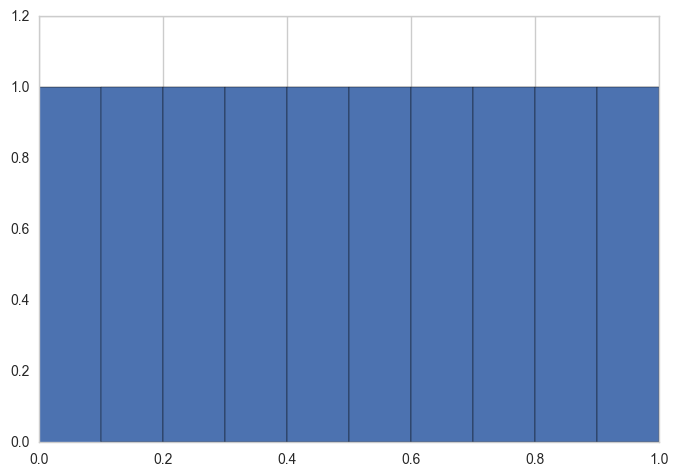

In [18]:
x, bins,_ = plt.hist(df.x, normed=True)

In [20]:
print x 
print bins
print np.diff(bins)
np.sum(x * np.diff(bins))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


1.0

In [3]:
button = '''<A HREF= "#" onClick="window.open('./test.html', 'Sample');return false">
See the sample</A>.
'''
HTML(button)

In [4]:
import mpld3
# mpld3.enable_notebook()
from mpld3 import plugins
from jinja2 import Template

In [5]:
fig, ax = plt.subplots()
x, y = np.random.rand(40), np.random.rand(40)
scatter_plot = ax.scatter(x, y, s=300, alpha=0.3)

labels = ["{0}, {1}".format(round(point[0],2), round(point[1],2)) for point in zip(x, y)]
tooltip = plugins.PointLabelTooltip(scatter_plot, labels)


plugins.connect(fig, tooltip)
mpld3.display(fig)

In [6]:
from IPython.display import display, HTML, Javascript
from jinja2 import Template
movie_list = [
    {'name': 'Movie 1',
    'image_url' :'https://img1.doubanio.com/view/movie_poster_cover/mpst/public/p2369022569.jpg'},
    {'name': 'Movie 2',
    'image_url' :'https://img1.doubanio.com/view/movie_poster_cover/mpst/public/p2373184418.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
]

In [7]:
template = Template('''
        <div class='thumbnail'>
            <div class='caption'>
                <h3 class='movie-title'>{{movie['name']}}</h3>
                <img src={{movie['image_url']}}>
                <p><a class='btn btn-primary' >Button</a> <a href='#' class='btn btn-default'>Button</a></p>
            </div>
        </div>
''')

In [8]:
fig, ax = plt.subplots()
points = ax.plot(range(6), 'o', ms=10) 
labels = [template.render(movie=movie) for movie in movie_list] 

plugins.connect(fig, plugins.PointHTMLTooltip(points[0], labels)) 
mpld3.display(fig)

In [9]:
load_assets()

In [10]:
template = Template('''
<div class='row'>
    {% for movie in movies %}
        <div class='col-xs-3'>
            <div class='thumbnail'>
                <div class='caption'>
                    <h3 class='movie-title'>{{movie['name']}}</h3>
                    <img src={{movie['image_url']}}>
                    <p><a class='btn btn-primary' >Button</a> <a href='#' class='btn btn-default'>Button</a></p>
                </div>
            </div>
        </div>
    {% endfor %}
</div>
''')
HTML(template.render(movies=movie_list))